 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [2]:
with open('pickle/timeseries_four_bedroom_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)

In [3]:
with open('pickle/timeseries_four_bedroom_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)

In [4]:
subset.head(6)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95742,95817,95832,95626,95811,95683,95693,95655,95638,95690
02/2008,294533.0,496845.0,382580.0,356100.0,440000.0,309845.0,356772.0,411370.0,333160.0,332736.0,...,410569.0,323110.0,285400.0,255665.0,479578.0,532068.0,714965.0,381315.0,615501.0,480153.0
03/2008,280619.0,482942.0,368020.0,342555.0,428695.0,296629.0,345842.0,395734.0,320794.0,321957.0,...,393909.0,310403.0,272399.0,250123.0,469913.0,518667.0,692770.0,367604.0,597900.0,467093.0
04/2008,269283.0,473565.0,357091.0,331481.0,420716.0,284132.0,337024.0,382545.0,311209.0,313526.0,...,380894.0,300456.0,260154.0,247616.0,463829.0,509869.0,677851.0,357093.0,583061.0,457246.0
05/2008,256444.0,467402.0,347241.0,321248.0,414449.0,269976.0,329691.0,370773.0,302186.0,305775.0,...,368042.0,294556.0,247046.0,244343.0,460248.0,500644.0,663819.0,347984.0,569388.0,447447.0
06/2008,244234.0,460919.0,336447.0,311486.0,408295.0,255905.0,322178.0,359880.0,292937.0,297402.0,...,357956.0,290893.0,233889.0,239208.0,459553.0,489671.0,651369.0,340649.0,560656.0,443489.0
07/2008,229907.0,455527.0,327252.0,302685.0,404595.0,242912.0,315414.0,349745.0,283900.0,289650.0,...,349155.0,288928.0,221805.0,234947.0,460706.0,478612.0,638562.0,334317.0,552203.0,439416.0


In [5]:
subset_percent.head()

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95742,95817,95832,95626,95811,95683,95693,95655,95638,95690
03/2008,-4.724089,-2.798257,-3.805740,-3.803707,-2.569318,-4.265358,-3.063581,-3.800958,-3.711730,-3.239505,...,-4.057783,-3.932716,-4.555361,-2.167680,-2.015313,-2.518663,-3.104348,-3.595715,-2.859622,-2.719966
04/2008,-4.039641,-1.941641,-2.969676,-3.232766,-1.861230,-4.213007,-2.549719,-3.332794,-2.987899,-2.618673,...,-3.304063,-3.204544,-4.495244,-1.002307,-1.294708,-1.696271,-2.153529,-2.859327,-2.481853,-2.108145
05/2008,-4.767846,-1.301405,-2.758401,-3.087055,-1.489603,-4.982191,-2.175809,-3.077285,-2.899338,-2.472203,...,-3.374167,-1.963682,-5.038554,-1.321805,-0.772052,-1.809288,-2.070071,-2.550876,-2.345038,-2.143048
06/2008,-4.761273,-1.387029,-3.108504,-3.038774,-1.484863,-5.211945,-2.278800,-2.937916,-3.060698,-2.738288,...,-2.740448,-1.243567,-5.325729,-2.101554,-0.151006,-2.191777,-1.875511,-2.107856,-1.533576,-0.884574
07/2008,-5.866096,-1.169837,-2.732971,-2.825488,-0.906208,-5.077275,-2.099461,-2.816217,-3.084964,-2.606573,...,-2.458682,-0.675506,-5.166553,-1.781295,0.250896,-2.258455,-1.966167,-1.858805,-1.507698,-0.918399


  train test split

In [6]:
trdf_percent = subset_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [7]:
trdf_price = subset.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [8]:
subset_percent.head(3)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95742,95817,95832,95626,95811,95683,95693,95655,95638,95690
03/2008,-4.724089,-2.798257,-3.805740,-3.803707,-2.569318,-4.265358,-3.063581,-3.800958,-3.711730,-3.239505,...,-4.057783,-3.932716,-4.555361,-2.167680,-2.015313,-2.518663,-3.104348,-3.595715,-2.859622,-2.719966
04/2008,-4.039641,-1.941641,-2.969676,-3.232766,-1.861230,-4.213007,-2.549719,-3.332794,-2.987899,-2.618673,...,-3.304063,-3.204544,-4.495244,-1.002307,-1.294708,-1.696271,-2.153529,-2.859327,-2.481853,-2.108145
05/2008,-4.767846,-1.301405,-2.758401,-3.087055,-1.489603,-4.982191,-2.175809,-3.077285,-2.899338,-2.472203,...,-3.374167,-1.963682,-5.038554,-1.321805,-0.772052,-1.809288,-2.070071,-2.550876,-2.345038,-2.143048


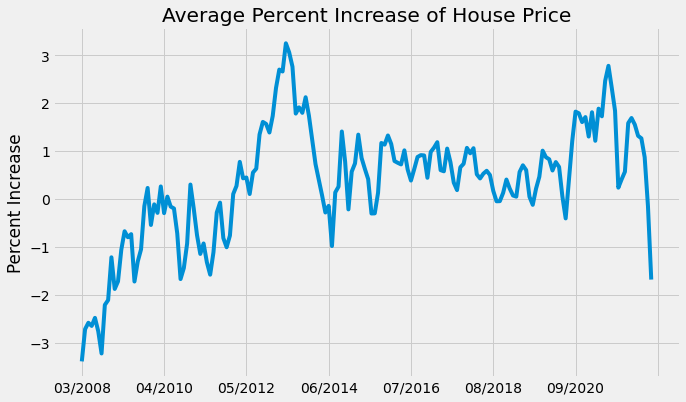

In [9]:
mean = np.mean(subset_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of House Price')
plt.show()

Average Housing Price

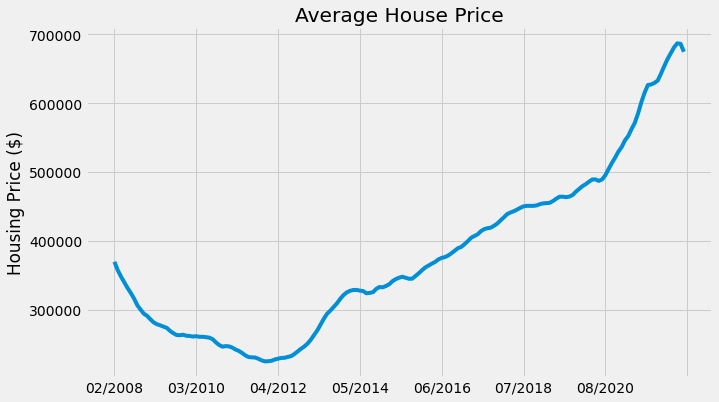

In [10]:
price_mean = np.mean(subset, axis = 1)
ax = price_mean.plot(figsize = (10, 6))
plt.ylabel('Housing Price ($)')
plt.title('Average House Price')
plt.show()

 Percent Increase All Zip Codes

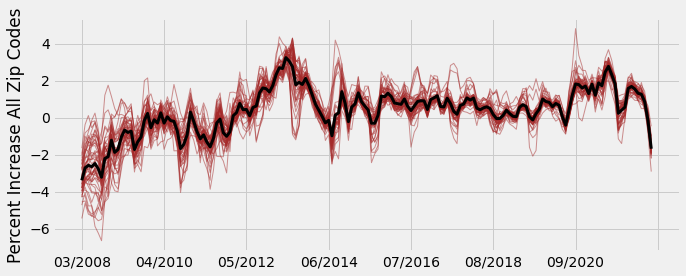

In [11]:
subset_percent.plot(figsize = (10, 4), lw = 1, color = 'brown', alpha = 0.5)
mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [12]:
subset.head(23)

,95823,95630,95624,95758,95608,95828,95670,95757,95843,95610,...,95742,95817,95832,95626,95811,95683,95693,95655,95638,95690
02/2008,294533.0,496845.0,382580.0,356100.0,440000.0,309845.0,356772.0,411370.0,333160.0,332736.0,...,410569.0,323110.0,285400.0,255665.0,479578.0,532068.0,714965.0,381315.0,615501.0,480153.0
03/2008,280619.0,482942.0,368020.0,342555.0,428695.0,296629.0,345842.0,395734.0,320794.0,321957.0,...,393909.0,310403.0,272399.0,250123.0,469913.0,518667.0,692770.0,367604.0,597900.0,467093.0
04/2008,269283.0,473565.0,357091.0,331481.0,420716.0,284132.0,337024.0,382545.0,311209.0,313526.0,...,380894.0,300456.0,260154.0,247616.0,463829.0,509869.0,677851.0,357093.0,583061.0,457246.0
05/2008,256444.0,467402.0,347241.0,321248.0,414449.0,269976.0,329691.0,370773.0,302186.0,305775.0,...,368042.0,294556.0,247046.0,244343.0,460248.0,500644.0,663819.0,347984.0,569388.0,447447.0
06/2008,244234.0,460919.0,336447.0,311486.0,408295.0,255905.0,322178.0,359880.0,292937.0,297402.0,...,357956.0,290893.0,233889.0,239208.0,459553.0,489671.0,651369.0,340649.0,560656.0,443489.0
07/2008,229907.0,455527.0,327252.0,302685.0,404595.0,242912.0,315414.0,349745.0,283900.0,289650.0,...,349155.0,288928.0,221805.0,234947.0,460706.0,478612.0,638562.0,334317.0,552203.0,439416.0
08/2008,215579.0,448811.0,317384.0,293053.0,399692.0,231130.0,307796.0,338051.0,274713.0,282020.0,...,341969.0,285138.0,211481.0,230418.0,457863.0,467404.0,622983.0,326680.0,541643.0,434450.0
09/2008,201252.0,442482.0,308016.0,283217.0,391569.0,219049.0,298933.0,326164.0,265313.0,275635.0,...,332927.0,279606.0,202962.0,228189.0,448858.0,454957.0,600172.0,317225.0,520571.0,416692.0
10/2008,192259.0,440129.0,301658.0,277183.0,385326.0,210087.0,294285.0,319057.0,259148.0,272691.0,...,327612.0,273714.0,197940.0,230966.0,443899.0,448589.0,584151.0,310735.0,505972.0,403547.0
11/2008,185712.0,436709.0,296047.0,271815.0,379701.0,202524.0,288716.0,312955.0,253545.0,269895.0,...,321477.0,267081.0,193240.0,235029.0,441207.0,443584.0,570588.0,304103.0,492850.0,386432.0


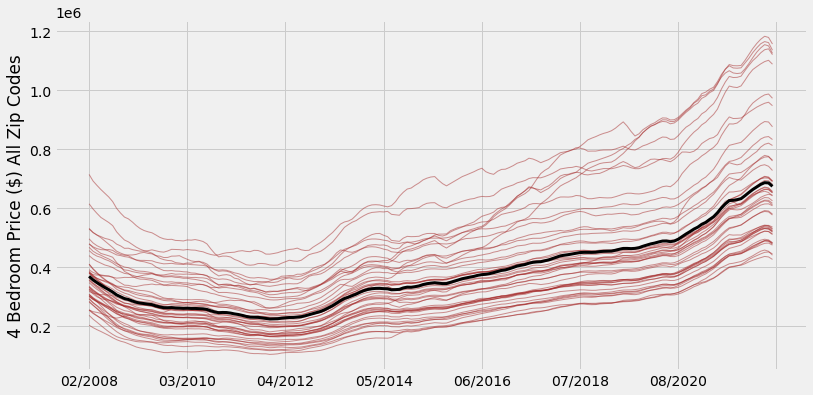

In [18]:
subset.plot(figsize = (12, 6), lw = 1, color = 'brown', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('4 Bedroom Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [14]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [15]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95816, 95824, 95834, 95815]


 zip closest to average

In [16]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95825
